In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load email edges
edges = pd.read_csv("email-Eu-core.txt", sep=" ", names=["source", "target"])

# Load department labels
labels = pd.read_csv("email-Eu-core-department-labels.txt", sep=" ", names=["node", "department"])

# Build graph
G = nx.from_pandas_edgelist(edges, "source", "target", create_using=nx.DiGraph())


In [ ]:
def graph_info(G):
    return {
        "nodes": G.number_of_nodes(),
        "edges": G.number_of_edges(),
        "directed": G.is_directed(),
        "density": nx.density(G)
    }

print(graph_info(G))
print("Departments:", labels['department'].nunique())

{'nodes': 1005, 'edges': 25571, 'directed': True, 'density': 0.025342411448732432}
Departments: 42


In [34]:
import pandas as pd

# Density (whole directed graph)
density = nx.density(G)

# Largest weakly connected component (undirected for path/diameter)
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()
G_lcc_undirected = G_lcc.to_undirected()

# Compute metrics
avg_path_length = nx.average_shortest_path_length(G_lcc_undirected)
diameter = nx.diameter(G_lcc_undirected)
clustering = nx.average_clustering(G_lcc_undirected)

# Build table
metrics = {
    "Metric": ["Density", "Avg. Path Length", "Diameter", "Clustering Coefficient"],
    "Value": [density, avg_path_length, diameter, clustering]
}

df_metrics = pd.DataFrame(metrics)

# Display nicely
print(df_metrics)



                   Metric     Value
0                 Density  0.025342
1        Avg. Path Length  2.586934
2                Diameter  7.000000
3  Clustering Coefficient  0.407050


In [20]:
# Assortativity (do people email mostly within their department?)
print("Assortativity by department:", nx.attribute_assortativity_coefficient(G, "department"))


Assortativity by department: nan


/opt/anaconda3/envs/sc4020/lib/python3.12/site-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in scalar divide
  r = (t - s) / (1 - s)


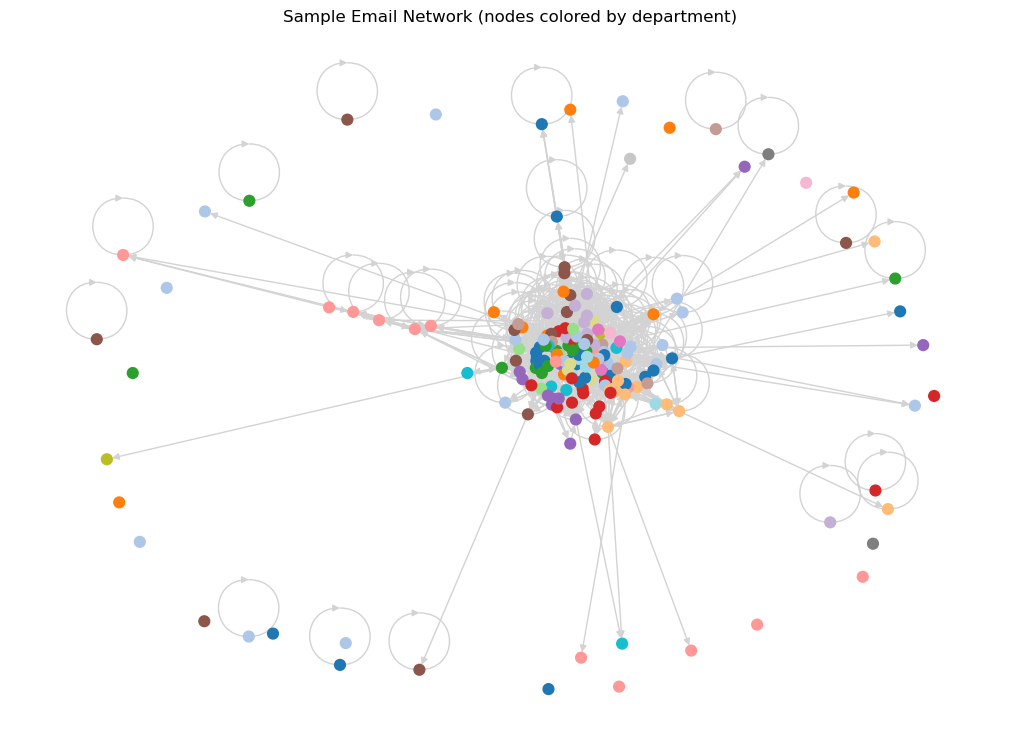

In [35]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Sample subgraph of 200 nodes
nodes_sample = random.sample(list(G.nodes()), 200)   # wrap in list()
H = G.subgraph(nodes_sample)

# Department mapping
dept_map = dict(zip(labels.node, labels.department))
colors = [dept_map.get(n, 0) for n in H.nodes()]

# Choose a nicer layout
pos = nx.spring_layout(H, seed=42)   # reproducible layout

plt.figure(figsize=(10,7))
nx.draw(
    H, pos,
    node_color=colors,
    node_size=60,
    cmap=plt.cm.tab20,
    with_labels=False,
    edge_color="lightgray"
)
plt.title("Sample Email Network (nodes colored by department)")
plt.show()


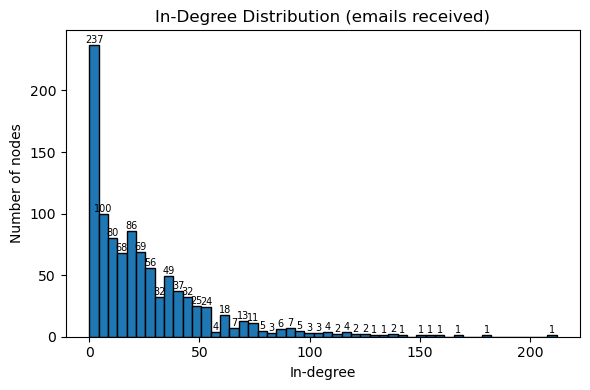

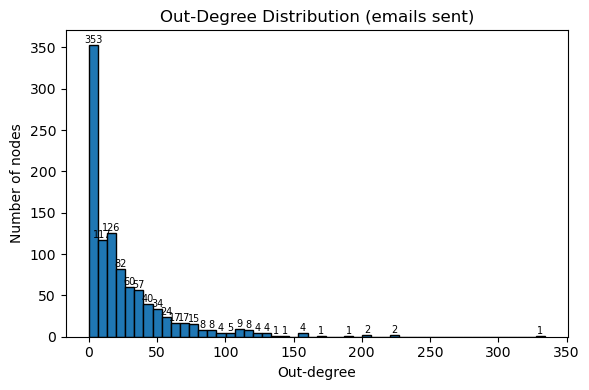

In [23]:
import matplotlib.pyplot as plt

# In-degree distribution
plt.figure(figsize=(6,4))
in_degrees = list(dict(G.in_degree()).values())
counts, bins, patches = plt.hist(in_degrees, bins=50, edgecolor='black')

# Add labels
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width()/2,
            count,
            str(int(count)),
            ha='center', va='bottom', fontsize=7
        )

plt.title("In-Degree Distribution (emails received)")
plt.xlabel("In-degree")
plt.ylabel("Number of nodes")
plt.tight_layout()
plt.show()

# Out-degree distribution
plt.figure(figsize=(6,4))
out_degrees = list(dict(G.out_degree()).values())
counts, bins, patches = plt.hist(out_degrees, bins=50, edgecolor='black')

# Add labels
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(
            patch.get_x() + patch.get_width()/2,
            count,
            str(int(count)),
            ha='center', va='bottom', fontsize=7
        )

plt.title("Out-Degree Distribution (emails sent)")
plt.xlabel("Out-degree")
plt.ylabel("Number of nodes")
plt.tight_layout()
plt.show()



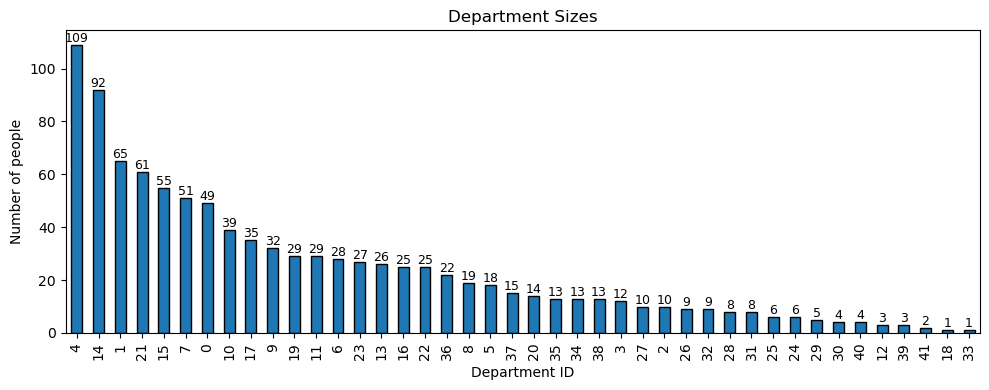

In [ ]:
ax = labels['department'].value_counts().plot(
    kind='bar', figsize=(10,4), edgecolor="black"
)

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x = center of bar
        height,                         # y = height of bar
        str(int(height)),               # label = count
        ha='center', va='bottom', fontsize=9
    )

plt.title("Department Sizes")
plt.xlabel("Department ID")
plt.ylabel("Number of people")
plt.tight_layout()
plt.show()


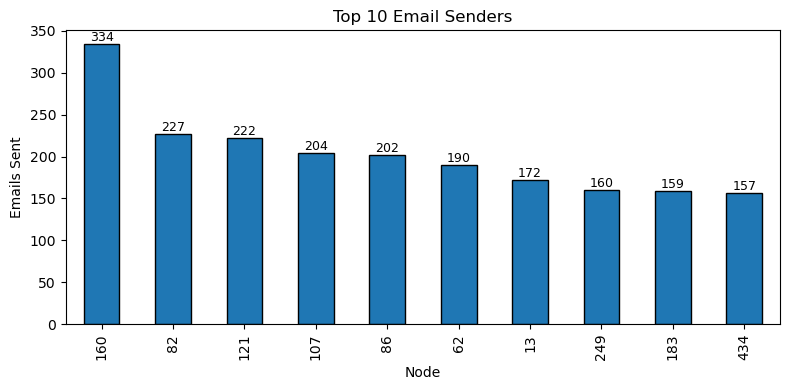

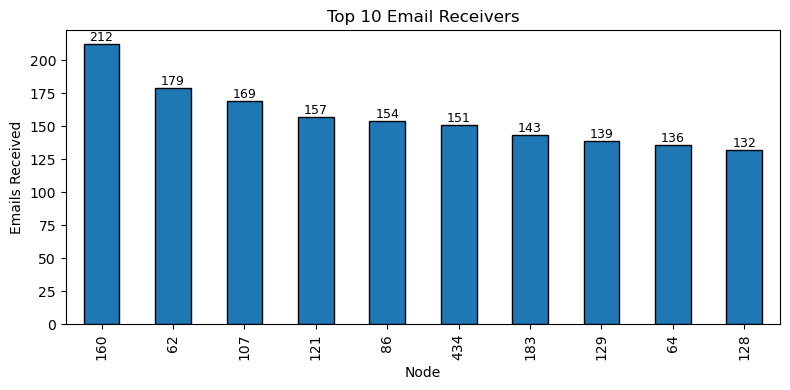

In [ ]:
out_degrees = dict(G.out_degree())
in_degrees = dict(G.in_degree())

# Top 10 email senders
ax = pd.Series(out_degrees).nlargest(10).plot(kind="bar", figsize=(8,4), edgecolor="black")

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        str(int(height)),
        ha="center", va="bottom", fontsize=9
    )

plt.title("Top 10 Email Senders")
plt.xlabel("Node")
plt.ylabel("Emails Sent")
plt.tight_layout()
plt.show()

# Top 10 email receivers
ax = pd.Series(in_degrees).nlargest(10).plot(kind="bar", figsize=(8,4), edgecolor="black")

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        str(int(height)),
        ha="center", va="bottom", fontsize=9
    )

plt.title("Top 10 Email Receivers")
plt.xlabel("Node")
plt.ylabel("Emails Received")
plt.tight_layout()
plt.show()



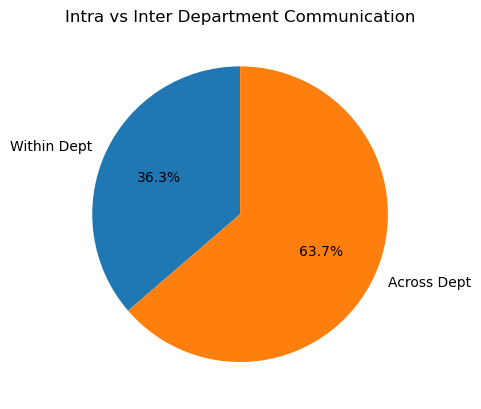

In [29]:
same_dept, diff_dept = 0, 0
dept_map = dict(zip(labels.node, labels.department))

for u, v in G.edges():
    if dept_map[u] == dept_map[v]:
        same_dept += 1
    else:
        diff_dept += 1

plt.pie([same_dept, diff_dept], labels=["Within Dept", "Across Dept"], autopct='%1.1f%%', startangle=90)
plt.title("Intra vs Inter Department Communication")
plt.show()
